In [1]:
# Import Python packages
import illustris_python as il
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Generic properties from matplotlib
rcParams['font.family'] = 'serif'
rcParams['text.usetex'] = True


In [2]:
# Load subhalos data for a specific redshift snapshot (e.g., z=0)
basePath = 'data'
sublink = il.groupcat.loadSubhalos(basePath, 99)
# Load header for a specific snapshot (e.g., snapshot 99)
#header = il.groupcat.loadHeader(basePath, 99)
#snapshot = il.snapshot.snapPath(basePath, 99)


In [6]:
# Extract positions (xyz) of subhalos
positions = sublink['SubhaloPos']  # Assuming positions are stored as (x, y, z)
position_x = positions[:,0]
position_y = positions[:,1]
position_z = positions[:,2]
# Extract masses of subhalos
masses = sublink['SubhaloMassType'][:, 1]  # Assuming we are interested in stellar mass

# Extract random redshift information from the header
redshift = np.linspace(20.05,0.0,masses.size)


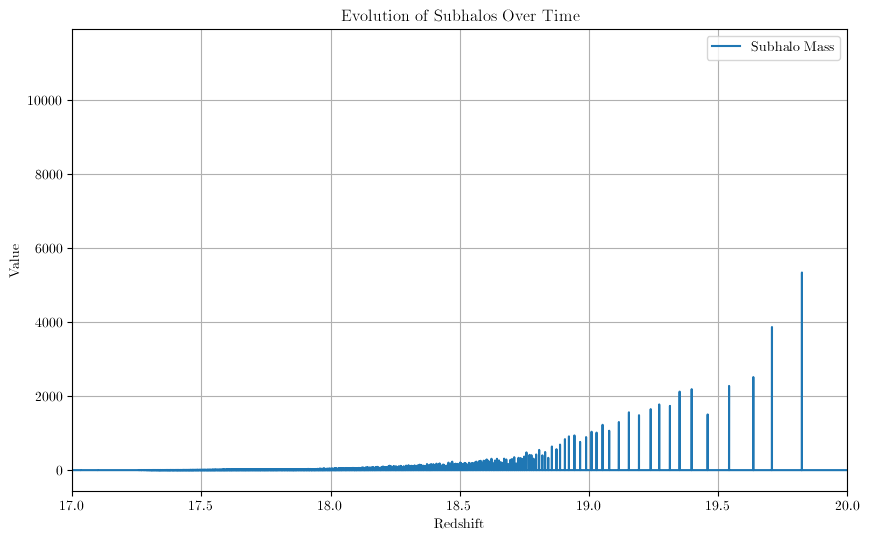

In [18]:
# Define the number of lag terms
lags = 1

# Fit autoregressive models for each feature
model_mass = AutoReg(masses, lags=lags)
result_mass = model_mass.fit()

model_x = AutoReg(position_x, lags=lags)
result_x = model_x.fit()

model_y = AutoReg(position_y, lags=lags)
result_y = model_y.fit()

model_z = AutoReg(position_z, lags=lags)
result_z = model_z.fit()

# Plot the evolution of subhalos over time
plt.figure(figsize=(10, 6))

# Plot subhalo mass
plt.plot(redshift, masses, label='Subhalo Mass')
#plt.plot(redshift, result_mass, label='Subhalo Mass Model')

# Plot subhalo positions (x, y, z)
#plt.plot(redshift, position_x, label='Subhalo X Position')
#plt.plot(redshift, position_y, label='Subhalo Y Position')
#plt.plot(redshift, position_z, label='Subhalo Z Position')

plt.xlabel('Redshift')
plt.xlim([17.0,20.0])
plt.ylabel('Value')
plt.title('Evolution of Subhalos Over Time')
plt.legend()
plt.grid(True)
plt.show()

2